In [45]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import os
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [46]:
csv_file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
project_dir = r'C:\\Users\\Brooz\\my_churn_app'
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [47]:
df.describe(include="all").head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.0,7043,7043,7043.0,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.0,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No


In [48]:
df.drop(columns=['customerID']).head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [49]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [50]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [51]:
print(df['Churn'].value_counts(normalize=True))

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [52]:
df.drop(labels=df[df["tenure"]==0].index, axis=0, inplace=True)


In [53]:
print(df["tenure"])

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7032, dtype: int64


In [54]:
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})
print(df["Churn"])


df.drop(labels=df[df["tenure"]==0].index,axis=0,inplace=True)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64


In [55]:
churn_analysis = df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack()
print(churn_analysis)

Churn                 0         1
SeniorCitizen                    
0              0.763497  0.236503
1              0.583187  0.416813


In [56]:
print(df["InternetService"].describe(include=['object', 'bool']))

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object


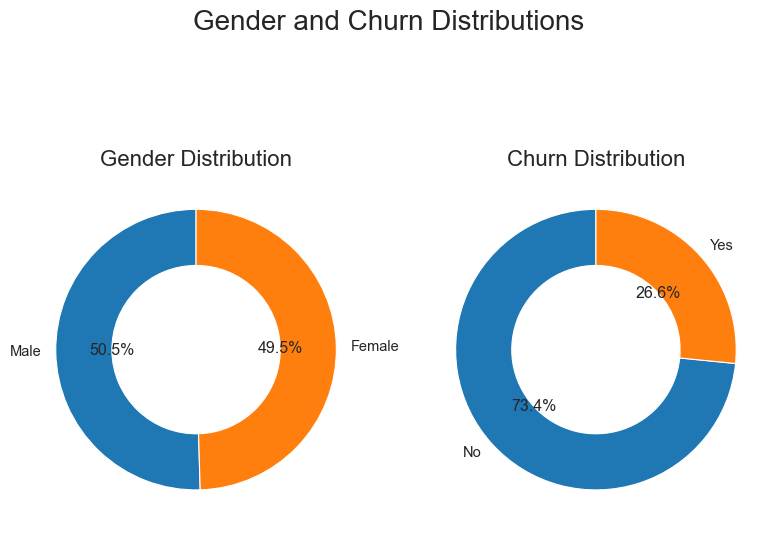

In [57]:

g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
gender_counts = df['gender'].value_counts()
churn_counts = df['Churn'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(8,6))
wedges_gender, texts_gender, autotexts_gender = axes[0].pie(gender_counts, labels=g_labels, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
axes[0].set_title('Gender Distribution', fontsize=16)
wedges_churn, texts_churn, autotexts_churn = axes[1].pie(churn_counts, labels=c_labels, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
axes[1].set_title('Churn Distribution', fontsize=16)
fig.suptitle("Gender and Churn Distributions", fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

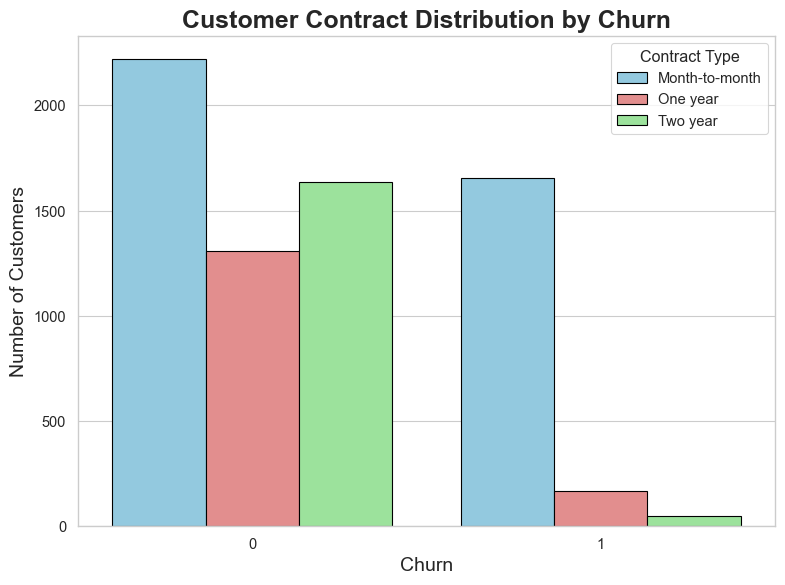

In [58]:

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
colors = {'Month-to-month': 'skyblue', 'One year': 'lightcoral', 'Two year': 'lightgreen'}
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn', hue='Contract', palette=colors, edgecolor='black')
plt.title("Customer Contract Distribution by Churn", fontsize=18, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(title="Contract Type", loc='upper right', frameon=True)
plt.tight_layout()
plt.show()

sns.set_style("whitegrid")


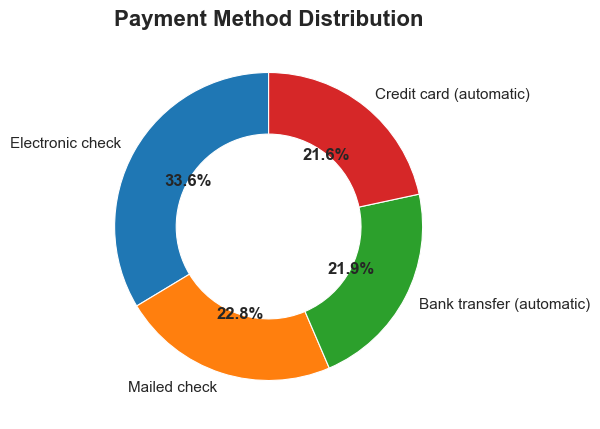

In [59]:

labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()
fig, ax = plt.subplots(figsize=(8, 5))
wedges, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
ax.set_title("Payment Method Distribution", fontsize=16, weight='bold')
ax.set_aspect('equal')
plt.setp(autotexts, size=12, weight="bold")
plt.setp(texts, size=11)
plt.show()

In [60]:
print(df["InternetService"].unique())
print(df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts())
# Note: Fixing the syntax error in the original code for Female
print(df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts())

['DSL' 'Fiber optic' 'No']
InternetService  Churn
DSL              0        992
Fiber optic      0        910
No               0        717
Fiber optic      1        633
DSL              1        240
No               1         57
Name: count, dtype: int64
InternetService  Churn
DSL              0        965
Fiber optic      0        889
No               0        690
Fiber optic      1        664
DSL              1        219
No               1         56
Name: count, dtype: int64


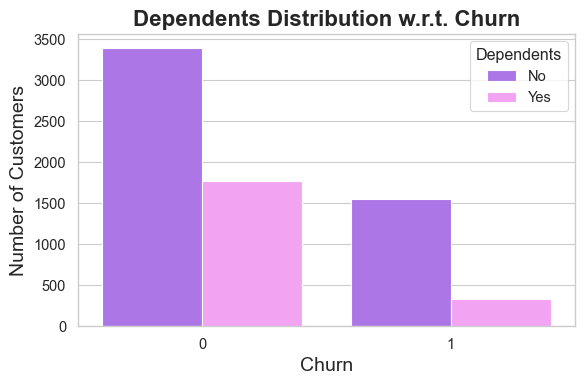

In [61]:

color_map_seaborn = {"Yes": "#FF97FF", "No": "#AB63FA"}
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', hue='Dependents', palette=color_map_seaborn)
plt.title("Dependents Distribution w.r.t. Churn", fontsize=16, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(title="Dependents", loc='upper right')
plt.tight_layout()
plt.show()

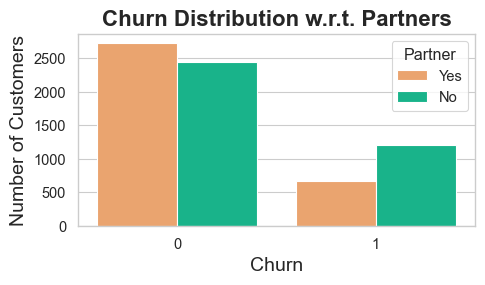

In [62]:
color_map_seaborn = {"Yes": '#FFA15A', "No": '#00CC96'}
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='Churn', hue='Partner', palette=color_map_seaborn)
plt.title("Churn Distribution w.r.t. Partners", fontsize=16, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(title="Partner", loc='upper right')
plt.tight_layout()
plt.show()

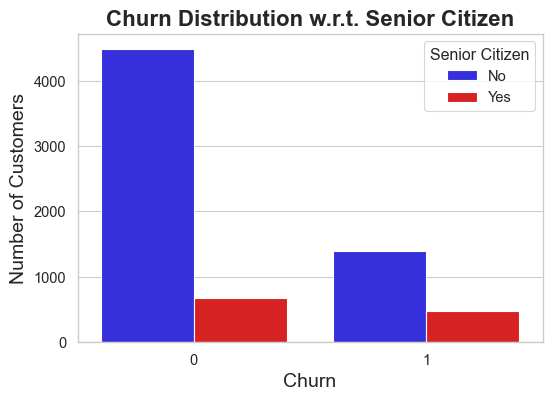

In [63]:

df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
color_map_seaborn = {"Yes": "#F40404C4", "No": "#1A13F7"}
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', hue='SeniorCitizen', palette=color_map_seaborn)
plt.title("Churn Distribution w.r.t. Senior Citizen", fontsize=16, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(title="Senior Citizen", loc='upper right')
plt.show()

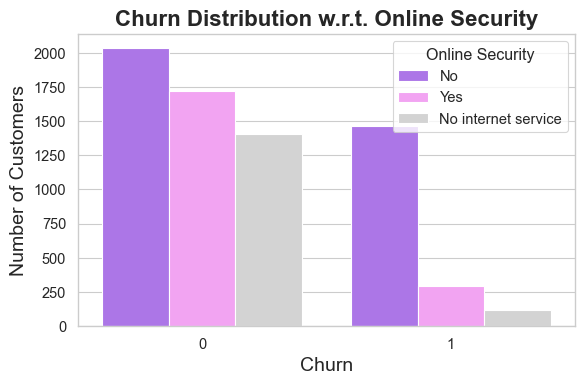

In [64]:

color_map_seaborn = {"Yes": "#FF97FF", "No": "#AB63FA", "No internet service": "#D3D3D3"}
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', hue='OnlineSecurity', palette=color_map_seaborn)
plt.title("Churn Distribution w.r.t. Online Security", fontsize=16, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(title="Online Security", loc='upper right')
plt.tight_layout()
plt.show()

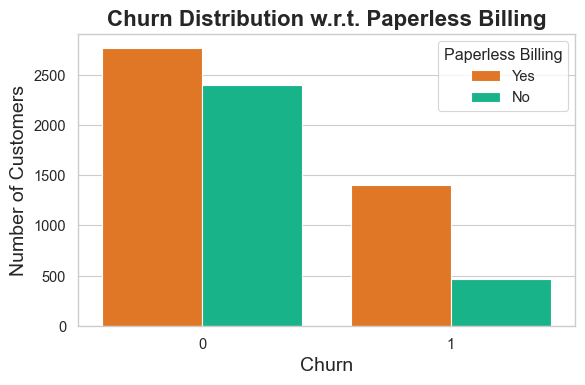

In [65]:

color_map_seaborn = {"Yes": "#FF7308", "No": '#00CC96'}
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', hue='PaperlessBilling', palette=color_map_seaborn)
plt.title("Churn Distribution w.r.t. Paperless Billing", fontsize=16, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(title="Paperless Billing", loc='upper right')
plt.tight_layout()
plt.show()

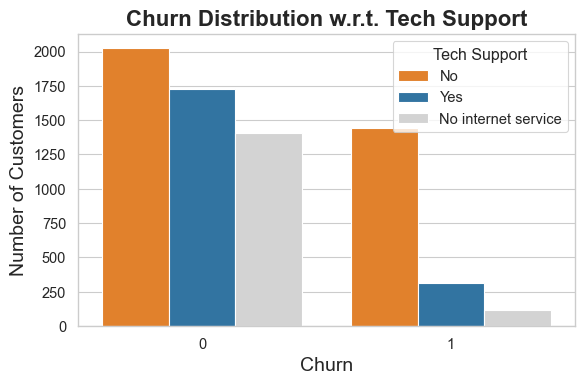

In [66]:
color_map_seaborn = {"Yes": '#1f77b4', "No": '#ff7f0e', "No internet service": '#d3d3d3'}
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', hue='TechSupport', palette=color_map_seaborn)
plt.title("Churn Distribution w.r.t. Tech Support", fontsize=16, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(title="Tech Support", loc='upper right')
plt.tight_layout()
plt.show()

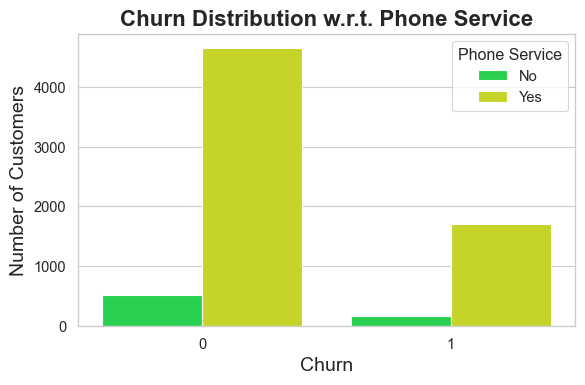

In [67]:
color_map_seaborn = {"Yes": "#DEF10D", "No": "#0EEA3E"}
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', hue='PhoneService', palette=color_map_seaborn)
plt.title("Churn Distribution w.r.t. Phone Service", fontsize=16, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(title="Phone Service", loc='upper right')
plt.tight_layout()
plt.show()

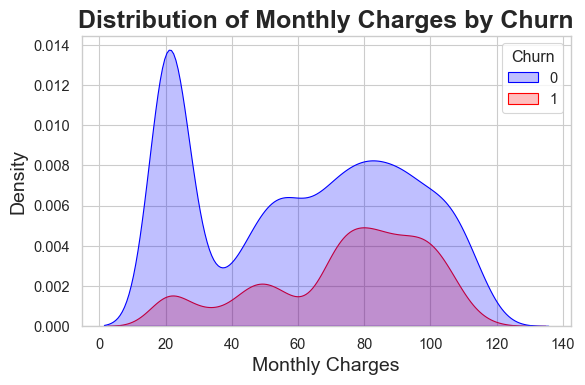

In [68]:

plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, palette=['blue', 'red'])
plt.title("Distribution of Monthly Charges by Churn", fontsize=18, weight='bold')
plt.xlabel("Monthly Charges", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.tight_layout()
plt.show()

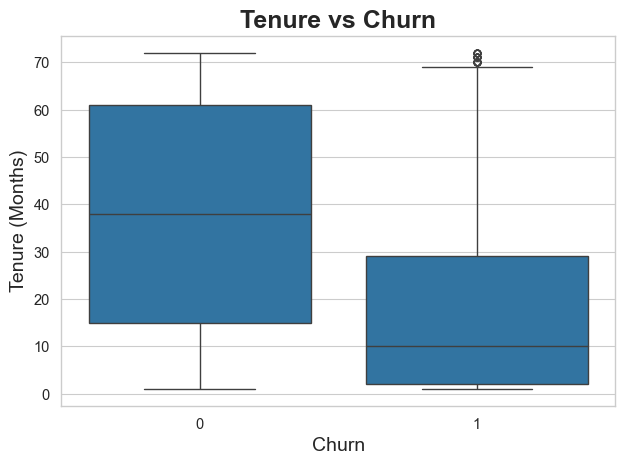

In [69]:

sns.boxplot(data=df, x='Churn', y='tenure')
plt.title("Tenure vs Churn", fontsize=18, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Tenure (Months)", fontsize=14)
plt.tight_layout()
plt.show()

In [70]:

def object_to_int(dataframe_series):
    if dataframe_series.dtype == 'object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
df = df.apply(lambda x: object_to_int(x))
print(df.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5365       0              0        1           0       1   
1        3953       1              0        0           0      34   
2        2558       1              0        0           0       2   
3        5524       1              0        0           0      45   
4        6500       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   


In [71]:
plt.figure(figsize=(14,7))
print(df.corr()['Churn'].sort_values(ascending=False))

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
TotalCharges        0.012891
PhoneService        0.011691
gender             -0.008545
customerID         -0.017858
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64


<Figure size 1400x700 with 0 Axes>

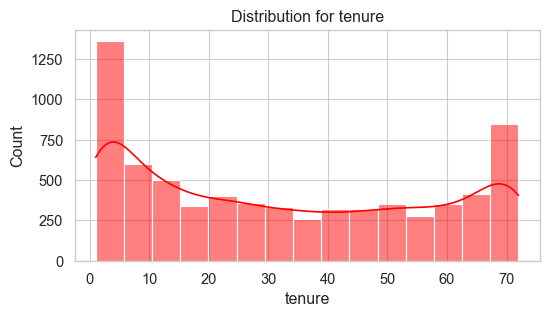

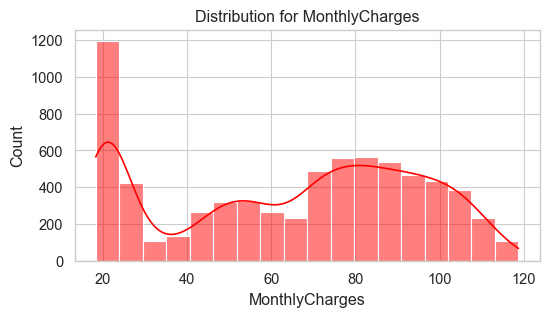

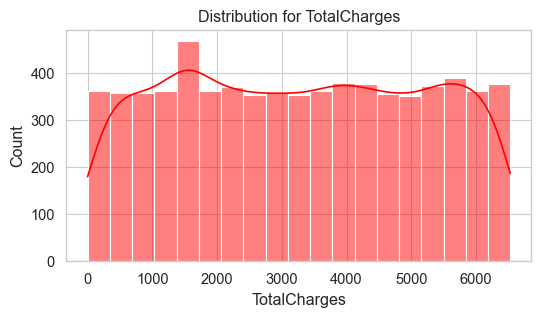

In [72]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(6,3))
    plt.title(f"Distribution for {feature}")
    sns.histplot(frame[feature], color=color, kde=True)
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols:
    distplot(feat, df)
plt.show()

In [73]:
X = df.drop(columns=['Churn'])
y = df['Churn'].values

# تقسیم داده
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


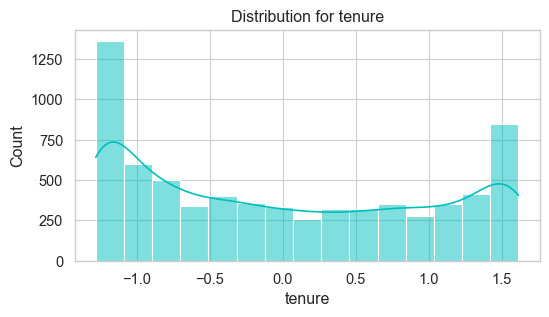

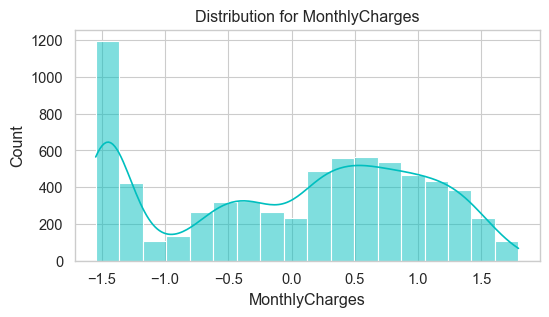

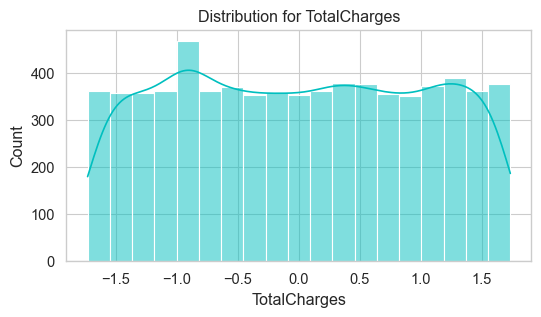

In [74]:

num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

df_std = pd.DataFrame(
    StandardScaler().fit_transform(df[num_cols].astype('float64')), 
    columns=num_cols
)

def distplot(feature, frame, color='c'):
    plt.figure(figsize=(6,3))
    plt.title(f"Distribution for {feature}")
    sns.histplot(frame[feature], color=color, kde=True)

for feat in num_cols:
    distplot(feat, df_std)

plt.show()


In [75]:
numeric_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)



In [ ]:
# Recall مهم‌تره چون می‌خوای حتی‌الامکان هیچ مشتری ارزشمندی از دست نره

# تابع عمومی برای ساخت پایپ‌لاین
# -----------------------------
def build_pipeline(model):
    return ImbPipeline([
        ('preproc', preprocessor),   # فرض می‌کنیم preprocessor از قبل تعریف شده
        ('smote', SMOTE(random_state=42)),
        ('clf', model)
    ])

# -----------------------------
# تعریف مدل‌ها
# -----------------------------
models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}

# -----------------------------
# تعریف پارامترهای گرید
# -----------------------------
param_grids = {
    'DecisionTree': {
        'clf__max_depth': [3, 5, 10, None],
        'clf__criterion': ['gini', 'entropy']
    },
    'RandomForest': {
        'clf__n_estimators': [50, 100],
        'clf__max_depth': [None, 10],
        'clf__class_weight': ['balanced', None]
    },
    'KNN': {
        'clf__n_neighbors': [3, 5, 7],
        'clf__weights': ['uniform', 'distance']
    },
    'SVM': {
        'clf__C': [0.1, 1],
        'clf__kernel': ['linear', 'rbf'],
        'clf__class_weight': ['balanced', None]
    },
    'AdaBoost': {
        'clf__n_estimators': [50, 100],
        'clf__learning_rate': [0.5, 1.0]
    },
    'GradientBoosting': {
        'clf__n_estimators': [50, 100],
        'clf__learning_rate': [0.05, 0.1],
        'clf__max_depth': [3, 5]
    },
    'LogisticRegression': {
        'clf__C': [0.1, 1, 10],
        'clf__class_weight': ['balanced', None]
    },
    'CatBoost': {
        'clf__depth': [4, 6],
        'clf__learning_rate': [0.01, 0.1],
        'clf__iterations': [100, 200]
    }
}

# -----------------------------
# اجرای مدل‌ها و ذخیره نتایج
# -----------------------------
results = []

for model_name, model in models.items():
    print(f"\n{'='*40}\nآموزش و ارزیابی مدل: {model_name}\n{'='*40}")

    pipeline = build_pipeline(model)

    grid = GridSearchCV(
        pipeline,
        param_grid=param_grids[model_name],
        scoring='f1',
        cv=5,
        n_jobs=-1
    )

    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

    # ذخیره نتایج
    results.append({
        "Model": model_name,
        "Best Params": grid.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    })

    # چاپ خلاصه
    print(f"✅ بهترین پارامترها: {grid.best_params_}")
    print(f"📊 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"📊 Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"📊 Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"📊 F1-score: {f1_score(y_test, y_pred):.4f}")

# -----------------------------
# نمایش همه نتایج در یک DataFrame
# -----------------------------
results_df = pd.DataFrame(results)
print("\n📊 نتایج کلی همه مدل‌ها:")
print(results_df)

# اگر بخوای توی جدول خروجی ببینی (مثلاً Jupyter)
import IPython.display as display
display.display(results_df)



آموزش و ارزیابی مدل: DecisionTree
✅ بهترین پارامترها: {'clf__criterion': 'entropy', 'clf__max_depth': 5}
📊 Accuracy: 0.7562
📊 Precision: 0.5328
📊 Recall: 0.6738
📊 F1-score: 0.5950

آموزش و ارزیابی مدل: RandomForest
✅ بهترین پارامترها: {'clf__class_weight': 'balanced', 'clf__max_depth': 10, 'clf__n_estimators': 50}
📊 Accuracy: 0.7704
📊 Precision: 0.5539
📊 Recall: 0.7005
📊 F1-score: 0.6187

آموزش و ارزیابی مدل: KNN
✅ بهترین پارامترها: {'clf__n_neighbors': 7, 'clf__weights': 'uniform'}
📊 Accuracy: 0.6837
📊 Precision: 0.4453
📊 Recall: 0.7727
📊 F1-score: 0.5650

آموزش و ارزیابی مدل: SVM
✅ بهترین پارامترها: {'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__kernel': 'linear'}
📊 Accuracy: 0.7285
📊 Precision: 0.4933
📊 Recall: 0.7834
📊 F1-score: 0.6054

آموزش و ارزیابی مدل: AdaBoost
✅ بهترین پارامترها: {'clf__learning_rate': 1.0, 'clf__n_estimators': 100}
📊 Accuracy: 0.7363
📊 Precision: 0.5026
📊 Recall: 0.7674
📊 F1-score: 0.6074

آموزش و ارزیابی مدل: GradientBoosting
✅ بهترین پارامترها: {'

,Model,Best Params,Accuracy,Precision,Recall,F1-score
0,DecisionTree,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.756219,0.532770,0.673797,0.595041
1,RandomForest,"{'clf__class_weight': 'balanced', 'clf__max_de...",0.770434,0.553911,0.700535,0.618654
2,KNN,"{'clf__n_neighbors': 7, 'clf__weights': 'unifo...",0.683724,0.445300,0.772727,0.565005
3,SVM,"{'clf__C': 0.1, 'clf__class_weight': 'balanced...",0.728500,0.493266,0.783422,0.605372
4,AdaBoost,"{'clf__learning_rate': 1.0, 'clf__n_estimators...",0.736318,0.502627,0.767380,0.607407
5,GradientBoosting,"{'clf__learning_rate': 0.1, 'clf__max_depth': ...",0.759062,0.533719,0.740642,0.620381
6,LogisticRegression,"{'clf__C': 0.1, 'clf__class_weight': 'balanced'}",0.735608,0.501724,0.778075,0.610063
7,CatBoost,"{'clf__depth': 6, 'clf__iterations': 200, 'clf...",0.761194,0.535714,0.762032,0.629139


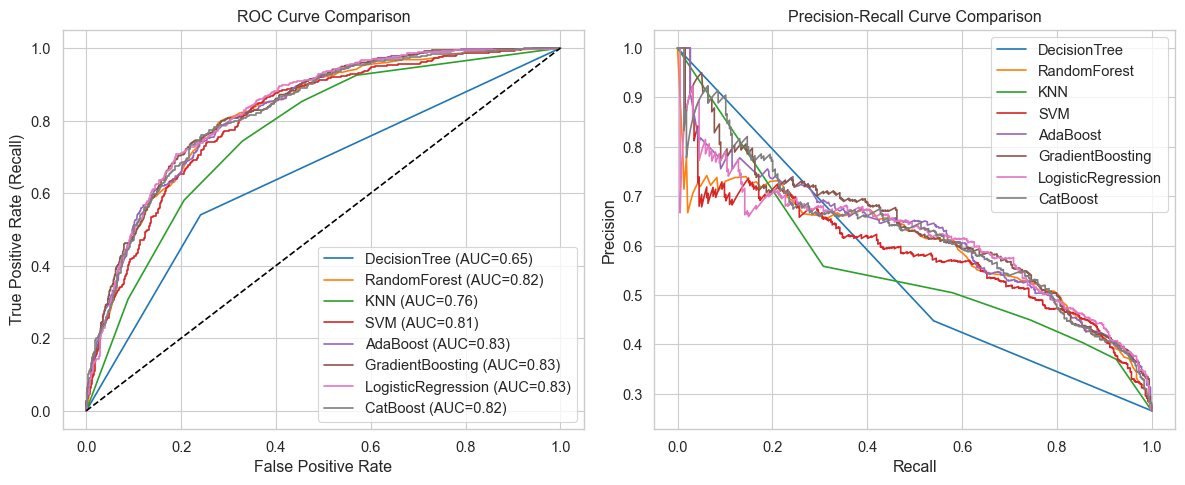

In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

plt.figure(figsize=(12,5))

# ----- ROC Curve -----
plt.subplot(1,2,1)
for model_name, model in models.items():
    pipeline = build_pipeline(model)
    pipeline.fit(X_train, y_train)
    if hasattr(pipeline, "predict_proba"):  # بعضی مدل‌ها مثل SVM نیاز به probability=True دارند
        y_score = pipeline.predict_proba(X_test)[:,1]
    else:
        y_score = pipeline.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={roc_auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve Comparison")
plt.legend()

# ----- PR Curve -----
plt.subplot(1,2,2)
for model_name, model in models.items():
    pipeline = build_pipeline(model)
    pipeline.fit(X_train, y_train)
    if hasattr(pipeline, "predict_proba"):
        y_score = pipeline.predict_proba(X_test)[:,1]
    else:
        y_score = pipeline.decision_function(X_test)

    precision, recall, _ = precision_recall_curve(y_test, y_score)
    plt.plot(recall, precision, label=model_name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()

plt.tight_layout()
plt.show()


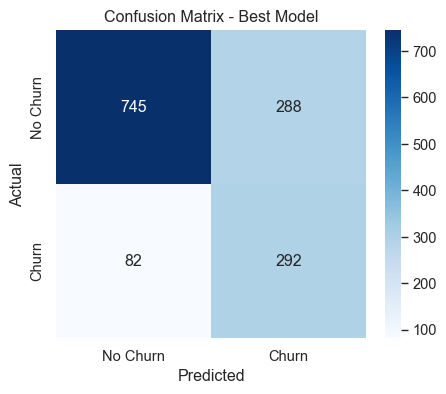

In [92]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# بهترین مدل رو انتخاب کن (مثلا Logistic Regression)
best_model = LogisticRegression(random_state=42, max_iter=1000, class_weight="balanced")
pipeline = build_pipeline(best_model)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best Model")
plt.show()


In [77]:
results = []
for model_name, model in models.items():
    pipeline = build_pipeline(model)
    grid = GridSearchCV(pipeline, param_grid=param_grids[model_name],
                        scoring='f1', cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    results.append({
        "Model": model_name,
        "Best Params": grid.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results).sort_values(by="F1", ascending=False)
print(results_df)


                Model                                        Best Params  \
7            CatBoost  {'clf__depth': 6, 'clf__iterations': 200, 'clf...   
5    GradientBoosting  {'clf__learning_rate': 0.1, 'clf__max_depth': ...   
1        RandomForest  {'clf__class_weight': 'balanced', 'clf__max_de...   
6  LogisticRegression   {'clf__C': 0.1, 'clf__class_weight': 'balanced'}   
4            AdaBoost  {'clf__learning_rate': 1.0, 'clf__n_estimators...   
3                 SVM  {'clf__C': 0.1, 'clf__class_weight': 'balanced...   
0        DecisionTree  {'clf__criterion': 'entropy', 'clf__max_depth'...   
2                 KNN  {'clf__n_neighbors': 7, 'clf__weights': 'unifo...   

   Accuracy  Precision    Recall        F1  
7  0.761194   0.535714  0.762032  0.629139  
5  0.759062   0.533719  0.740642  0.620381  
1  0.770434   0.553911  0.700535  0.618654  
6  0.735608   0.501724  0.778075  0.610063  
4  0.736318   0.502627  0.767380  0.607407  
3  0.728500   0.493266  0.783422  0.605372  


In [78]:

knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test, y_test)
print("KNN accuracy:", accuracy_knn)
print(classification_report(y_test, predicted_y))

KNN accuracy: 0.7171286425017769
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1033
           1       0.34      0.07      0.12       374

    accuracy                           0.72      1407
   macro avg       0.54      0.51      0.47      1407
weighted avg       0.63      0.72      0.64      1407



In [79]:
lr = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000)
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print("Logistic Regression (balanced):")
print(classification_report(y_test, pred_lr))

Logistic Regression (balanced):
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.60       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



In [80]:

svc_model = SVC(random_state=1)
svc_model.fit(X_train, y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test, y_test)
print("SVM accuracy is:", accuracy_svc)
print(classification_report(y_test, predict_y))

SVM accuracy is: 0.7341862117981521
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407



Random Forest accuracy: 0.7860696517412935
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.79      0.77      1407



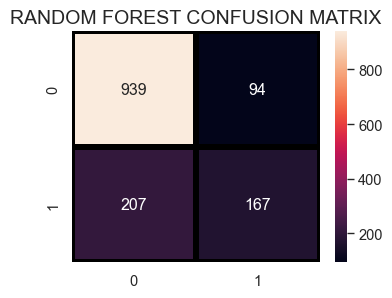

In [81]:

model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1, random_state=50, max_features='sqrt', max_leaf_nodes=30)
model_rf.fit(X_train, y_train)
prediction_test = model_rf.predict(X_test)
print("Random Forest accuracy:", metrics.accuracy_score(y_test, prediction_test))
print(classification_report(y_test, prediction_test))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.show()

In [82]:
rf_model = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1, random_state=50, max_features='sqrt', max_leaf_nodes=30)
rf_model.fit(X_train_res, y_train_res)
pred_rf = rf_model.predict(X_test)
print("Random Forest accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

Random Forest accuracy: 0.7505330490405118
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1033
           1       0.52      0.66      0.58       374

    accuracy                           0.75      1407
   macro avg       0.69      0.72      0.70      1407
weighted avg       0.77      0.75      0.76      1407



In [83]:
pipe_rf = ImbPipeline([
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1, random_state=50, max_features='sqrt', max_leaf_nodes=30, class_weight='balanced'))
])
pipe_rf.fit(X_train, y_train)
pred_rf = pipe_rf.predict(X_test)
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.53      0.75      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.76      0.77      1407



Logistic Regression accuracy is: 0.7725657427149965
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.58      0.53      0.55       374

    accuracy                           0.77      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407



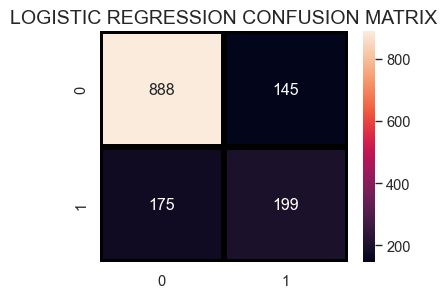

In [84]:

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
accuracy_lr = lr_model.score(X_test, y_test)
print("Logistic Regression accuracy is:", accuracy_lr)
lr_pred = lr_model.predict(X_test)
report = classification_report(y_test, lr_pred)
print(report)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX", fontsize=14)
plt.show()

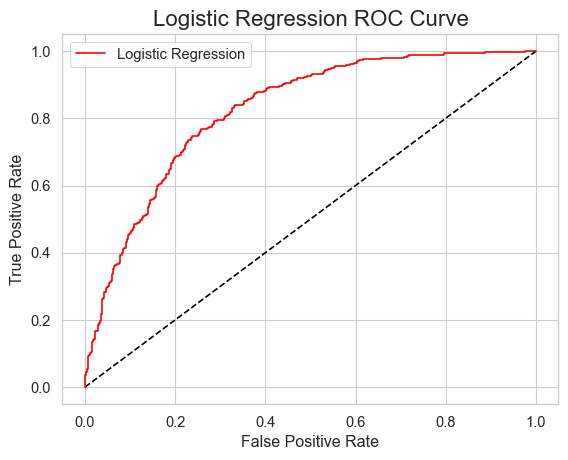

In [85]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression', color="r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.legend()
plt.show()

In [86]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test, y_test)
print("Decision Tree accuracy is:", accuracy_dt)
print(classification_report(y_test, predictdt_y))

Decision Tree accuracy is: 0.7121535181236673
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1033
           1       0.46      0.52      0.49       374

    accuracy                           0.71      1407
   macro avg       0.64      0.65      0.64      1407
weighted avg       0.72      0.71      0.72      1407



AdaBoost Classifier accuracy: 0.7782515991471215
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



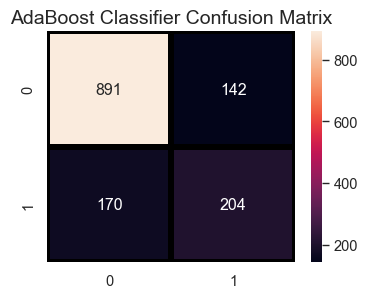

In [87]:
a_model = AdaBoostClassifier()
a_model.fit(X_train, y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy:", accuracy_score(y_test, a_preds))
print(classification_report(y_test, a_preds))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("AdaBoost Classifier Confusion Matrix", fontsize=14)
plt.show()

Gradient Boosting Classifier accuracy: 0.7917555081734187
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



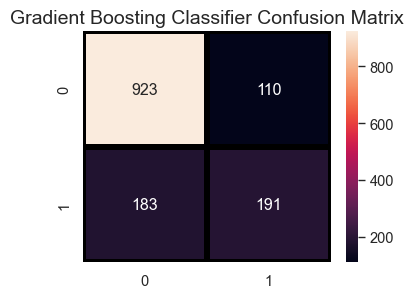

In [88]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("Gradient Boosting Classifier Confusion Matrix", fontsize=14)
plt.show()

In [89]:
pipe_gb = ImbPipeline([
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', GradientBoostingClassifier(random_state=42))
])
pipe_gb.fit(X_train, y_train)
pred_gb = pipe_gb.predict(X_test)
print("Gradient Boosting (pipeline) classification report:")
print(classification_report(y_test, pred_gb))

Gradient Boosting (pipeline) classification report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1033
           1       0.57      0.70      0.63       374

    accuracy                           0.78      1407
   macro avg       0.73      0.75      0.74      1407
weighted avg       0.80      0.78      0.79      1407



In [ ]:
# ما برای تعادل Precision/Recall، CatBoost رو انتخاب کردیم

from sklearn.ensemble import VotingClassifier

# -----------------------------
# تعریف مدل‌های پایه
# -----------------------------
clf1 = RandomForestClassifier(random_state=42, class_weight="balanced")
clf2 = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000, random_state=42)
clf3 = GradientBoostingClassifier(random_state=42)
clf4 = CatBoostClassifier(verbose=0, random_state=42)

# -----------------------------
# ساخت Voting Classifier (soft voting)
# -----------------------------
eclf = VotingClassifier(
    estimators=[
        ('rf', clf1),
        ('lr', clf2),
        ('gbc', clf3),
        ('cat', clf4)
    ],
    voting='soft'  # نرم → احتمال‌ها رو جمع می‌کنه
)

# -----------------------------
# تعریف پارامترها برای گرید سرچ
# -----------------------------
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20, None],
    'lr__C': [0.1, 1.0, 10.0],
    'gbc__n_estimators': [100, 200],
    'gbc__max_depth': [3, 5],
    'cat__depth': [4, 6],
    'cat__learning_rate': [0.05, 0.1],
    'cat__iterations': [200]
}

# -----------------------------
# اجرای GridSearchCV
# -----------------------------
grid_search = GridSearchCV(
    estimator=eclf,
    param_grid=param_grid,
    cv=5,
    scoring='recall',   # تاکید روی Recall برای شناسایی مشتریان در حال ریزش
    n_jobs=-1
)

# آموزش
grid_search.fit(X_train, y_train)

# نتایج
print("Best parameters found:", grid_search.best_params_)
print("Best Recall Score (CV):", grid_search.best_score_)

# بهترین مدل
best_voting_model = grid_search.best_estimator_

# پیش‌بینی روی داده تست
pred_vote = best_voting_model.predict(X_test)

# گزارش نهایی
print("\nVoting Classifier Final Results:")
print("Accuracy:", accuracy_score(y_test, pred_vote))
print("Precision:", precision_score(y_test, pred_vote))
print("Recall:", recall_score(y_test, pred_vote))
print("F1:", f1_score(y_test, pred_vote))
print("\nClassification Report:\n", classification_report(y_test, pred_vote))

In [ ]:
output_path = os.path.join('C:\\Users\\Brooz\\my_churn_app\\notebooks', 'voting_classifier_final_model.pkl')
joblib.dump(best_voting_model, output_path)
print("Model saved successfully.")
print(f"File saved at: {output_path}")

Model saved successfully.
File saved at: C:\Users\Brooz\my_churn_app\notebooks\voting_classifier_final_model.pkl
